# 8장 수치 시뮬레이션으로 소비자의 행동을 예측하는 테크닉 10

- 최적화 수법: 조건에 누락이나 오류가 있으면 현실과 다른 정답이 도출되기도 한다.
- **수치 시뮬레이션**: 미래 예측을 위한 선택지를 넓혀가는 수법

< 전제조건>
- links.csv: 재구매 고객 20명의 SNS 연결 상태 (1/0)
- links_members.csv: 모든 재구매 고객 540명의 SNS 연결 상태 (1/0)
- info_member.csv: 모든 재구매 고객 540명의 2년간 월별 이용 현황 (1/0)

In [1]:
# 경고(warning) 비표시
import warnings
warnings.filterwarnings('ignore')

## 71. 인간관계 네트워크를 가시화해보자

In [2]:
import pandas as pd

df_links = pd.read_csv("links.csv")
df_links

,Unnamed: 0,Node0,Node1,Node2,Node3,Node4,Node5,Node6,Node7,Node8,...,Node10,Node11,Node12,Node13,Node14,Node15,Node16,Node17,Node18,Node19
0,Node0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,Node1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,Node2,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Node3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,Node4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,Node5,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,Node6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,Node7,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,Node8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
9,Node9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


- 연결 가시화 방법: networkx
  - draw: 기본적인 시각화 함수, 라벨을 표시하지 않는다
  - draw_networkx
    - 다른 것과 연결이 많은 노드를 중심에 오게 자동으로 위치를 결정해서 가시화
    - 노드와 엣지 라벨을 표시한다
    - 재현성이 없기 때문에 실행 시에 그래프가 달라진다

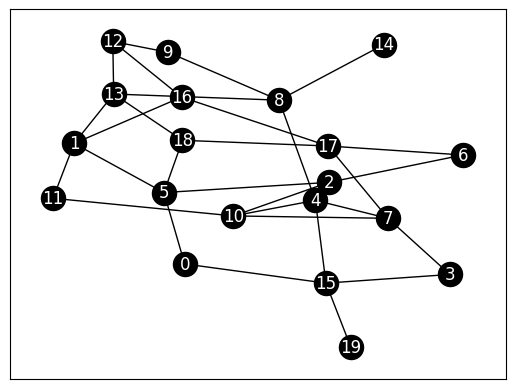

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

# 그래프 객체 생성
G = nx.Graph()

# 노드
NUM = len(df_links.index)   # 노드수
for i in range(1,NUM+1):
    node_no = df_links.columns[i].strip("Node")   # 노드 번호
    G.add_node(str(node_no))    # 노드 번호 str 변환 -> G에 추가

# 엣지
for i in range(NUM):
    for j in range(NUM):
        node_name = "Node" + str(j)
        if df_links[node_name].iloc[i]==1:
            G.add_edge(str(i),str(j))   # 연결되어 있으면 엣지 추가

# 그리기
nx.draw_networkx(G,node_color="k", edge_color="k", font_color="w")
plt.show()

## 72. 입소문에 의한 정보 전파 모습을 가시화해보자

- 입소문 전파 모습을 시뮬레이션해보자!!


> **'10개의 연결 중 하나의 확률(10% 확률)로 소문이 전파된다.'**라고 가정



### 입소문 상태

In [4]:
import numpy as np

- determine_link 함수: 입소문의 전파 여부를 확률적으로 결정
- simulate_percolation 함수: 입소문을 시뮬레이션

In [5]:
def determine_link(percent):    # percent: 연결될 확률
    rand_val = np.random.rand()

    if rand_val<=percent:
        return 1    # 노드 간에 링크가 있다고 가정
    else:
        return 0

In [6]:
# num: 노드수, list_active: 노드 활성화 여부, percent_percolation: 입소문을 일으킬 확률
def simulate_percolation(num, list_active, percent_percolation):
    for i in range(num):
        if list_active[i]==1:
            for j in range(num):
                node_name = "Node" + str(j)
                if df_links[node_name].iloc[i]==1:
                    if determine_link(percent_percolation)==1:
                        list_active[j] = 1
    return list_active

In [7]:
percent_percolation = 0.1   # 입소문을 일으킬 확률 10%
T_NUM = 36                  # 36개월 반복
NUM = len(df_links.index)
list_active = np.zeros(NUM)
list_active[0] = 1

list_timeSeries = []
for t in range(T_NUM):
    list_active = simulate_percolation(NUM, list_active, percent_percolation)
    list_timeSeries.append(list_active.copy())

### 입소문 모습을 네트워크로 가시화

- active_node_coloring
  - 입소문 전파 노드: 빨강
  - 입소문 전파X 노드: 검정
  - 1개월 후 -> 11개월 후 -> 36개월 후를 가시화해보자

In [8]:
def active_node_coloring(list_active):
    #print(list_timeSeries[t])
    list_color = []
    for i in range(len(list_timeSeries[t])):
        if list_timeSeries[t][i]==1:
            list_color.append("r")
        else:
            list_color.append("k")
    #print(len(list_color))
    return list_color

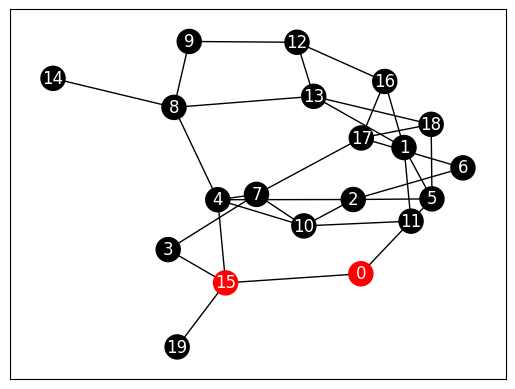

In [9]:
t = 0
nx.draw_networkx(G,font_color="w",node_color=active_node_coloring(list_timeSeries[t]))
plt.show()

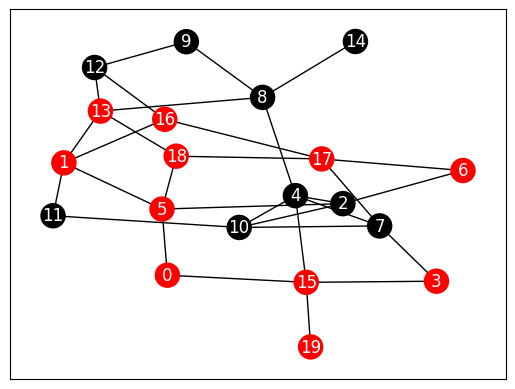

In [10]:
t = 11
nx.draw_networkx(G,font_color="w",node_color=active_node_coloring(list_timeSeries[t]))
plt.show()

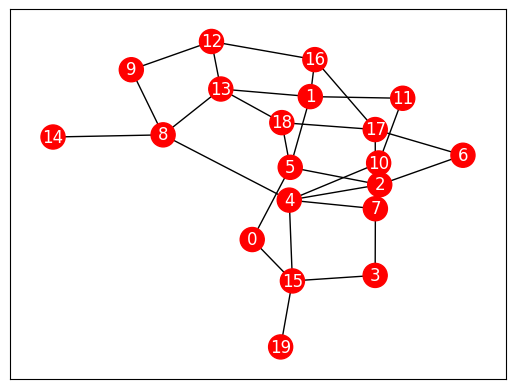

In [11]:
t = 35
nx.draw_networkx(G,font_color="w",node_color=active_node_coloring(list_timeSeries[t]))
plt.show()

< 입소문 가시화 결과 >
- 시간이 지날 수록 입소문이 거의 전원에게 전파되는 모습을 확인할 수 있다.

## 73. 입소문 수의 시계열 변화를 그래프화해보자

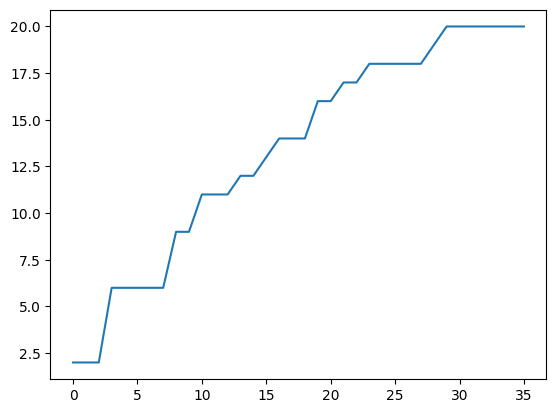

In [12]:
# 시계열 그래프 그리기
list_timeSeries_num = []
for i in range(len(list_timeSeries)):
    list_timeSeries_num.append(sum(list_timeSeries[i]))

plt.plot(list_timeSeries_num)
plt.show()

## 74. 회원수의 시계열 변화를 시뮬레이션해보자



> 입소문을 통해 스포츠 센터의 이용 상황이 어떻게 변화할까?



- simulate_population 함수
  - 매개변수
    1. num: 노드수
    2. list_active: 노드의 활성화 상태
    3. percent_percolation: 확산 확률
    4. percent_disappearence: 소멸 확률
    5. df_links: 노드들 간의 연결 관계
  
  - 확산: 노드 활성화 & 연결 활성화 & 확산 확률에 따라 활성화(1)
  - 소멸: 소멸 확률에 따라 비활성화(0)

In [13]:
def simulate_population(num, list_active, percent_percolation, percent_disapparence,df_links):
    # 확산 #
    for i in range(num):
        if list_active[i]==1:
            for j in range(num):
                if df_links.iloc[i][j]==1:
                    if determine_link(percent_percolation)==1:
                        list_active[j] = 1
    # 소멸 #
    for i in range(num):
        if determine_link(percent_disapparence)==1:
            list_active[i] = 0
    return list_active

### 시계열 그래프

#### 확산 확률 10% & 소멸 확률 5%

In [14]:
percent_percolation = 0.1
percent_disapparence = 0.05
T_NUM = 100
NUM = len(df_links.index)
list_active = np.zeros(NUM)
list_active[0] = 1

list_timeSeries = []
for t in range(T_NUM):
    list_active = simulate_population(NUM, list_active, percent_percolation, percent_disapparence,df_links)
    list_timeSeries.append(list_active.copy())

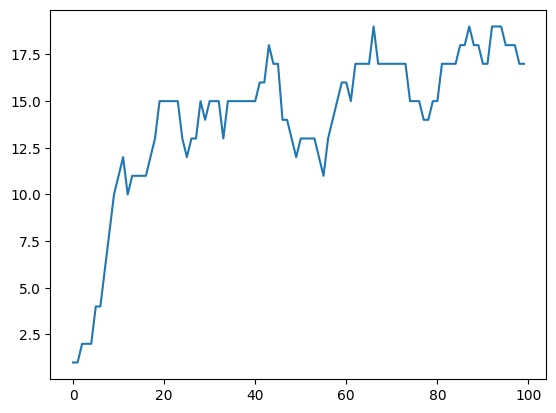

In [15]:
# 시계열 그래프 그리기
list_timeSeries_num = []
for i in range(len(list_timeSeries)):
    list_timeSeries_num.append(sum(list_timeSeries[i]))

plt.plot(list_timeSeries_num)
plt.show()

결과: 회원의 증가과 감소가 반복적으로 일어나면서 결국 계속 증가한다.

#### 소멸 확률 20%로 증가

In [16]:
percent_disapparence = 0.2
list_active = np.zeros(NUM)
list_active[0] = 1
list_timeSeries = []
for t in range(T_NUM):
    list_active = simulate_population(NUM, list_active, percent_percolation, percent_disapparence,df_links)
    list_timeSeries.append(list_active.copy())

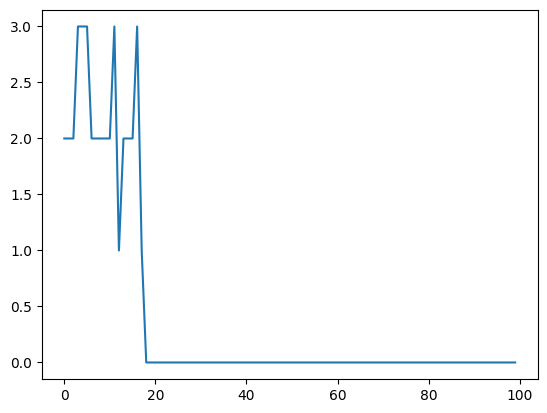

In [17]:
# 시계열 그래프 그리기
list_timeSeries_num = []
for i in range(len(list_timeSeries)):
    list_timeSeries_num.append(sum(list_timeSeries[i]))

plt.plot(list_timeSeries_num)
plt.show()

결과: 처음에는 증감의 모습이 보이지만 결국에는 이용자가 없어진다.

## 75. 파라미터 전체를 '상관관계'를 보면서 파악해보자

- 확산 확률과 소멸 확률이 활성화된 노드 수에 미치는 영향

In [18]:
# 상관관계 계산
print("상관관계 계산시작")
T_NUM = 100
NUM_PhaseDiagram = 20
phaseDiagram = np.zeros((NUM_PhaseDiagram,NUM_PhaseDiagram))
for i_p in range(NUM_PhaseDiagram):
    for i_d in range(NUM_PhaseDiagram):
        percent_percolation = 0.05*i_p      # 확산 확률
        percent_disapparence = 0.05*i_d     # 소멸 확률
        list_active = np.zeros(NUM)         # 노드 초기: 비활성화 상태
        list_active[0] = 1
        for t in range(T_NUM):
            list_active = simulate_population(NUM, list_active, percent_percolation, percent_disapparence,df_links)
        phaseDiagram[i_p][i_d] = sum(list_active)     # 활성화된 노드수
print(phaseDiagram)

상관관계 계산시작
[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [20.  3.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [20. 13.  6.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [20. 17. 13.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [20. 14. 14.  9. 16.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [20. 15. 17.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [20. 17. 15. 16. 12.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [20. 18. 17. 16.  0. 10.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [20. 18. 17.  0. 14.  0. 15.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [20. 17. 17. 17. 16. 13. 13.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [20. 19. 15. 15. 18. 17.  6. 13.  7. 12.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [20. 19. 18. 17. 11.  9. 13.  8. 10.  6.  0.  0.  0.  

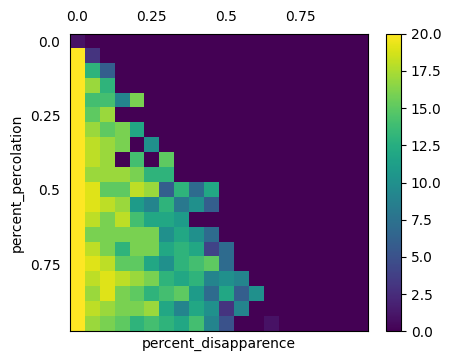

In [19]:
# 표시
plt.matshow(phaseDiagram)
plt.colorbar(shrink=0.8)
plt.xlabel('percent_disapparence')
plt.ylabel('percent_percolation')
plt.xticks(np.arange(0.0, 20.0,5), np.arange(0.0, 1.0, 0.25))
plt.yticks(np.arange(0.0, 20.0,5), np.arange(0.0, 1.0, 0.25))
plt.tick_params(bottom=False,
                left=False,
                right=False,
                top=False)
plt.show()

< 상관관계 분석 >
  - 소멸 확률이 낮으면 확산 확률이 낮아도 탈퇴를 거의 하지 않는다.
  - 소멸 확률이 20~30%를 넘으면 확산 확률이 높아도 이용자는 증가하지 않는다.

## 76. 실제 데이터를 불러와보자

In [20]:
import pandas as pd

df_mem_links = pd.read_csv("links_members.csv")
df_mem_info = pd.read_csv("info_members.csv")
df_mem_links

,Unnamed: 0,Node0,Node1,Node2,Node3,Node4,Node5,Node6,Node7,Node8,...,Node530,Node531,Node532,Node533,Node534,Node535,Node536,Node537,Node538,Node539
0,Node0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Node1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Node2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,Node3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Node4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,Node535,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
536,Node536,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
537,Node537,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
538,Node538,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## 77. 링크 수의 분포를 가시화해보자

< 네트워크의 구조 >
- 스몰 월드형: 몇 안 되는 스텝으로 전원이 연결되는 구조
- 스케일 프리형: 소수의 연결을 많이 가지는 사람이 허브가 되는 구조

In [21]:
NUM = len(df_mem_links.index)   # 노드수
array_linkNum = np.zeros(NUM)
for i in range(NUM):
    array_linkNum[i] = sum(df_mem_links["Node"+str(i)])   # 노드의 연결 수

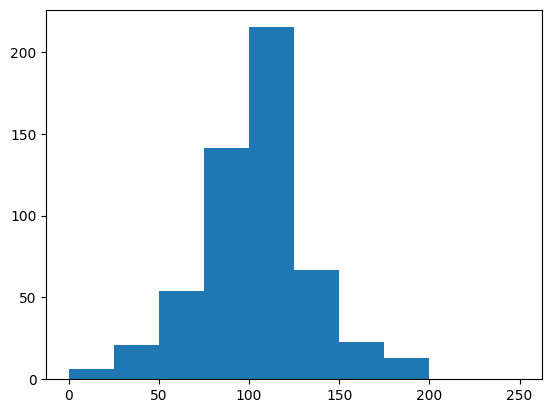

In [22]:
# hist: 히스토그램
plt.hist(array_linkNum, bins=10,range=(0,250))    # 연결 수 시각화, 0~250을 10구간으로
plt.show()

< 히스토그램 분석 >
- x축: 각 노드의 연결 개수
- y축: 해당 연결 수를 가진 노드수

- 대부분의 노드들이 유사한 링크 수를 가지고 있는 분포: **정규 분포**의 형태
    - 정규 분포: 데이터가 평균을 중심으로 대칭의 분포를 띤다
        - **허브에 의존하지 않고 입소문이 퍼지기 쉽다**
    - 스케일 프리 네트워크: 일부 노드가 매우 많은 연결을 가진다(허브 역할)
        - 허브가 작동하지 않으면(입소문을 퍼 뜨리지 않으면) 입소문이 중간에 퍼지지 않는다

## 78. 시뮬레이션을 위해 실제 데이터로부터 파라미터를 추정하자

- 추정할 파라미터: 입소문 확산 확률, 소멸 확률
    - 소멸 확률: 노드가 활성화(1)에서 비활성화(0)상태로 변화한 비율
    - 확산 확률: 노드가 비활성화(0)에서 활성화(1)상태로 변화한 비율

In [23]:
NUM = len(df_mem_info.index)
T_NUM = len(df_mem_info.columns)-1

# 소멸 확률 추정
count_active = 0
count_active_to_inactive = 0
for t in range(1,T_NUM):
    for i in range(NUM):
        if (df_mem_info.iloc[i][t]==1):       # 시간 t에서 노드가 활성화된 경우
            count_active_to_inactive += 1     # 활성화된 노드수 증가
            if (df_mem_info.iloc[i][t+1]==0):       # 다음 시간 t+1에서 비활성화된 경우
                count_active += 1                   # 활성화에서 비활성화로 변화한 경우 증가
estimated_percent_disapparence = count_active/count_active_to_inactive

In [24]:
# 확산 확률 추정
count_link = 0
count_link_to_active = 0
count_link_temp = 0
for t in range(T_NUM-1):
    df_link_t = df_mem_info[df_mem_info[str(t)]==1]     # 활성화된 노드
    temp_flag_count = np.zeros(NUM)                     # 이미 활성화 되었는지, 중복 방지

    # 활성화된 노드에 연결된 비활성화 노드 탐색
    for i in range(len(df_link_t.index)):
        df_link_temp = df_mem_links[df_mem_links["Node"+str(df_link_t.index[i])]==1]
        for j in range(len(df_link_temp.index)):
            if (df_mem_info.iloc[df_link_temp.index[j]][t]==0):
                if (temp_flag_count[df_link_temp.index[j]]==0):
                    count_link += 1                     # 비활성화된 노드수 증가
                # 비활성화 노드가 활성화로 전환되었는지
                if (df_mem_info.iloc[df_link_temp.index[j]][t+1]==1):
                    if (temp_flag_count[df_link_temp.index[j]]==0):
                        temp_flag_count[df_link_temp.index[j]] = 1
                        count_link_to_active += 1       # 비활성화에서 활성화로 전환된 노드수 증가
estimated_percent_percolation = count_link_to_active/count_link

In [25]:
estimated_percent_disapparence

0.10147163541419416

In [26]:
estimated_percent_percolation

0.025184661323275185

## 79. 실제 데이터와 시뮬레이션을 비교하자

- 78에서 추정한 확산 확률, 소멸 확률을 이용해서 시뮬레이션을 실행하자

#### 시뮬레이션

In [27]:
percent_percolation = 0.025184661323275185
percent_disapparence = 0.10147163541419416
T_NUM = 24
NUM = len(df_mem_links.index)
list_active = np.zeros(NUM)
list_active[0] = 1
list_timeSeries = []

# 각 시간 단계별로 확산 확률, 소멸 확률에 따라 활성화된 노드 상태를 업데이트
for t in range(T_NUM):
    list_active = simulate_population(NUM, list_active, percent_percolation, percent_disapparence,df_mem_links)
    list_timeSeries.append(list_active.copy())

In [28]:
list_timeSeries_num = []
for i in range(len(list_timeSeries)):
    list_timeSeries_num.append(sum(list_timeSeries[i]))

#### 실제

In [29]:
T_NUM = len(df_mem_info.columns)-1
list_timeSeries_num_real = []
for t in range(0,T_NUM):
    list_timeSeries_num_real.append(len(df_mem_info[df_mem_info[str(t)]==1].index))

#### 실제 데이터와 시뮬레이션을 시각화를 통해 비교해보자

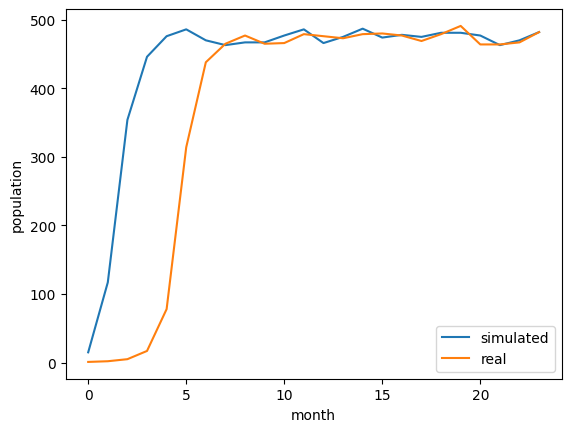

In [30]:
plt.plot(list_timeSeries_num, label = 'simulated')
plt.plot(list_timeSeries_num_real, label = 'real')
plt.xlabel('month')
plt.ylabel('population')
plt.legend(loc='lower right')
plt.show()

< 결과 분석 >
- 실제와 시뮬레이션의 이용자 경향은 비슷하게 증가한다
- 주의점: 시뮬레이션의 급격한 증가 지점은 난수의 영향으로 이르거나 빨리 증가하는 경우가 있기 때문에 오차가 생긴다
- 예측 정확도를 높이기 위해서 시뮬레이션을 여러 번 실행해서 평균값을 계산해보자

## 80. 시뮬레이션으로 미래를 예측해보자

In [31]:
percent_percolation = 0.025184661323275185
percent_disapparence = 0.10147163541419416
T_NUM = 36          # 시뮬레이터의 지속기간을 36개월로 설정
NUM = len(df_mem_links.index)
list_active = np.zeros(NUM)
list_active[0] = 1
list_timeSeries = []
for t in range(T_NUM):
    list_active = simulate_population(NUM, list_active, percent_percolation, percent_disapparence,df_mem_links)
    list_timeSeries.append(list_active.copy())

In [32]:
list_timeSeries_num = []
for i in range(len(list_timeSeries)):
    list_timeSeries_num.append(sum(list_timeSeries[i]))

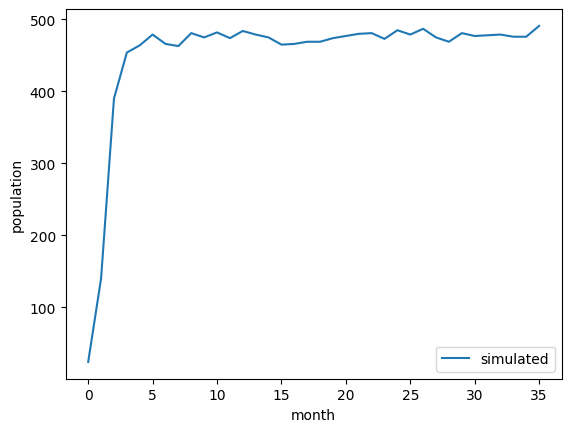

In [33]:
plt.plot(list_timeSeries_num, label = 'simulated')
plt.xlabel('month')
plt.ylabel('population')
plt.legend(loc='lower right')
plt.show()

< 결과 분석 >
- 24개월 이후부터는 population이 급격히 감소하지 않고 지속된다.
- 미래 예측: population은 지속될 것이다!!